Q1. Install and load the latest versions of TensorFlow and Keras. Print their versions.


In [10]:
# Importing Libraries
import tensorflow as tf
import keras as keras
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import os

In [11]:
# Checking version of Tensorflow ans Keras
print(f"Tensorflow Version {tf.__version__}")
print(f"Keras Version {keras.__version__}")

Tensorflow Version 2.14.0
Keras Version 2.14.0


In [ ]:
# upgrading tensor and keras
!pip install --upgrade tensorflow
!pip install --upgrade Keras

In [ ]:
# Checking version of Tensorflow ans Keras after update
print(f"Tensorflow Version {tf.__version__}")
print(f"Keras Version {keras.__version__}")

Tensorflow Version 2.14.0
Keras Version 2.14.0


Q2. Load the Wine Quality dataset and explore its dimensions.

Dataset link: https://www.kaggle.com/datasets/nareshbhat/wine-quality-binary-classification


In [12]:
#Loading dataset
from google.colab import files
uploaded = files.upload()

Saving wine.csv to wine (3).csv


In [14]:
#reading dataset
import io
df = pd.read_csv(io.BytesIO(uploaded['wine (3).csv']))

In [15]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,bad
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,bad
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,bad
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,good
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,bad


In [16]:
# Checking Dimensions of Dataset
df.shape

(1599, 12)

Q3. Check for null values, identify categorical variables, and encode them.


In [17]:
# checking for null values
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

There is No Null values in the dataset

In [18]:
# Checking for categorical variable
df.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                  object
dtype: object

quality is a categorical vaiable


In [19]:
# Encoding quality variable using Label encoding
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
# Encode labels in column 'quality'.
df['quality']= label_encoder.fit_transform(df['quality'])

In [20]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0


In [21]:
df["quality"].unique()

array([0, 1])

Q4. Separate the features and target variables from the dataset.


In [22]:
#Separating feature variable form dataset
features=df.columns[:11]
features

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol'],
      dtype='object')

In [23]:
# separating target variable from dataset
target=df.columns[11:]
target

Index(['quality'], dtype='object')

Text(0.5, 1.0, 'alcohol')

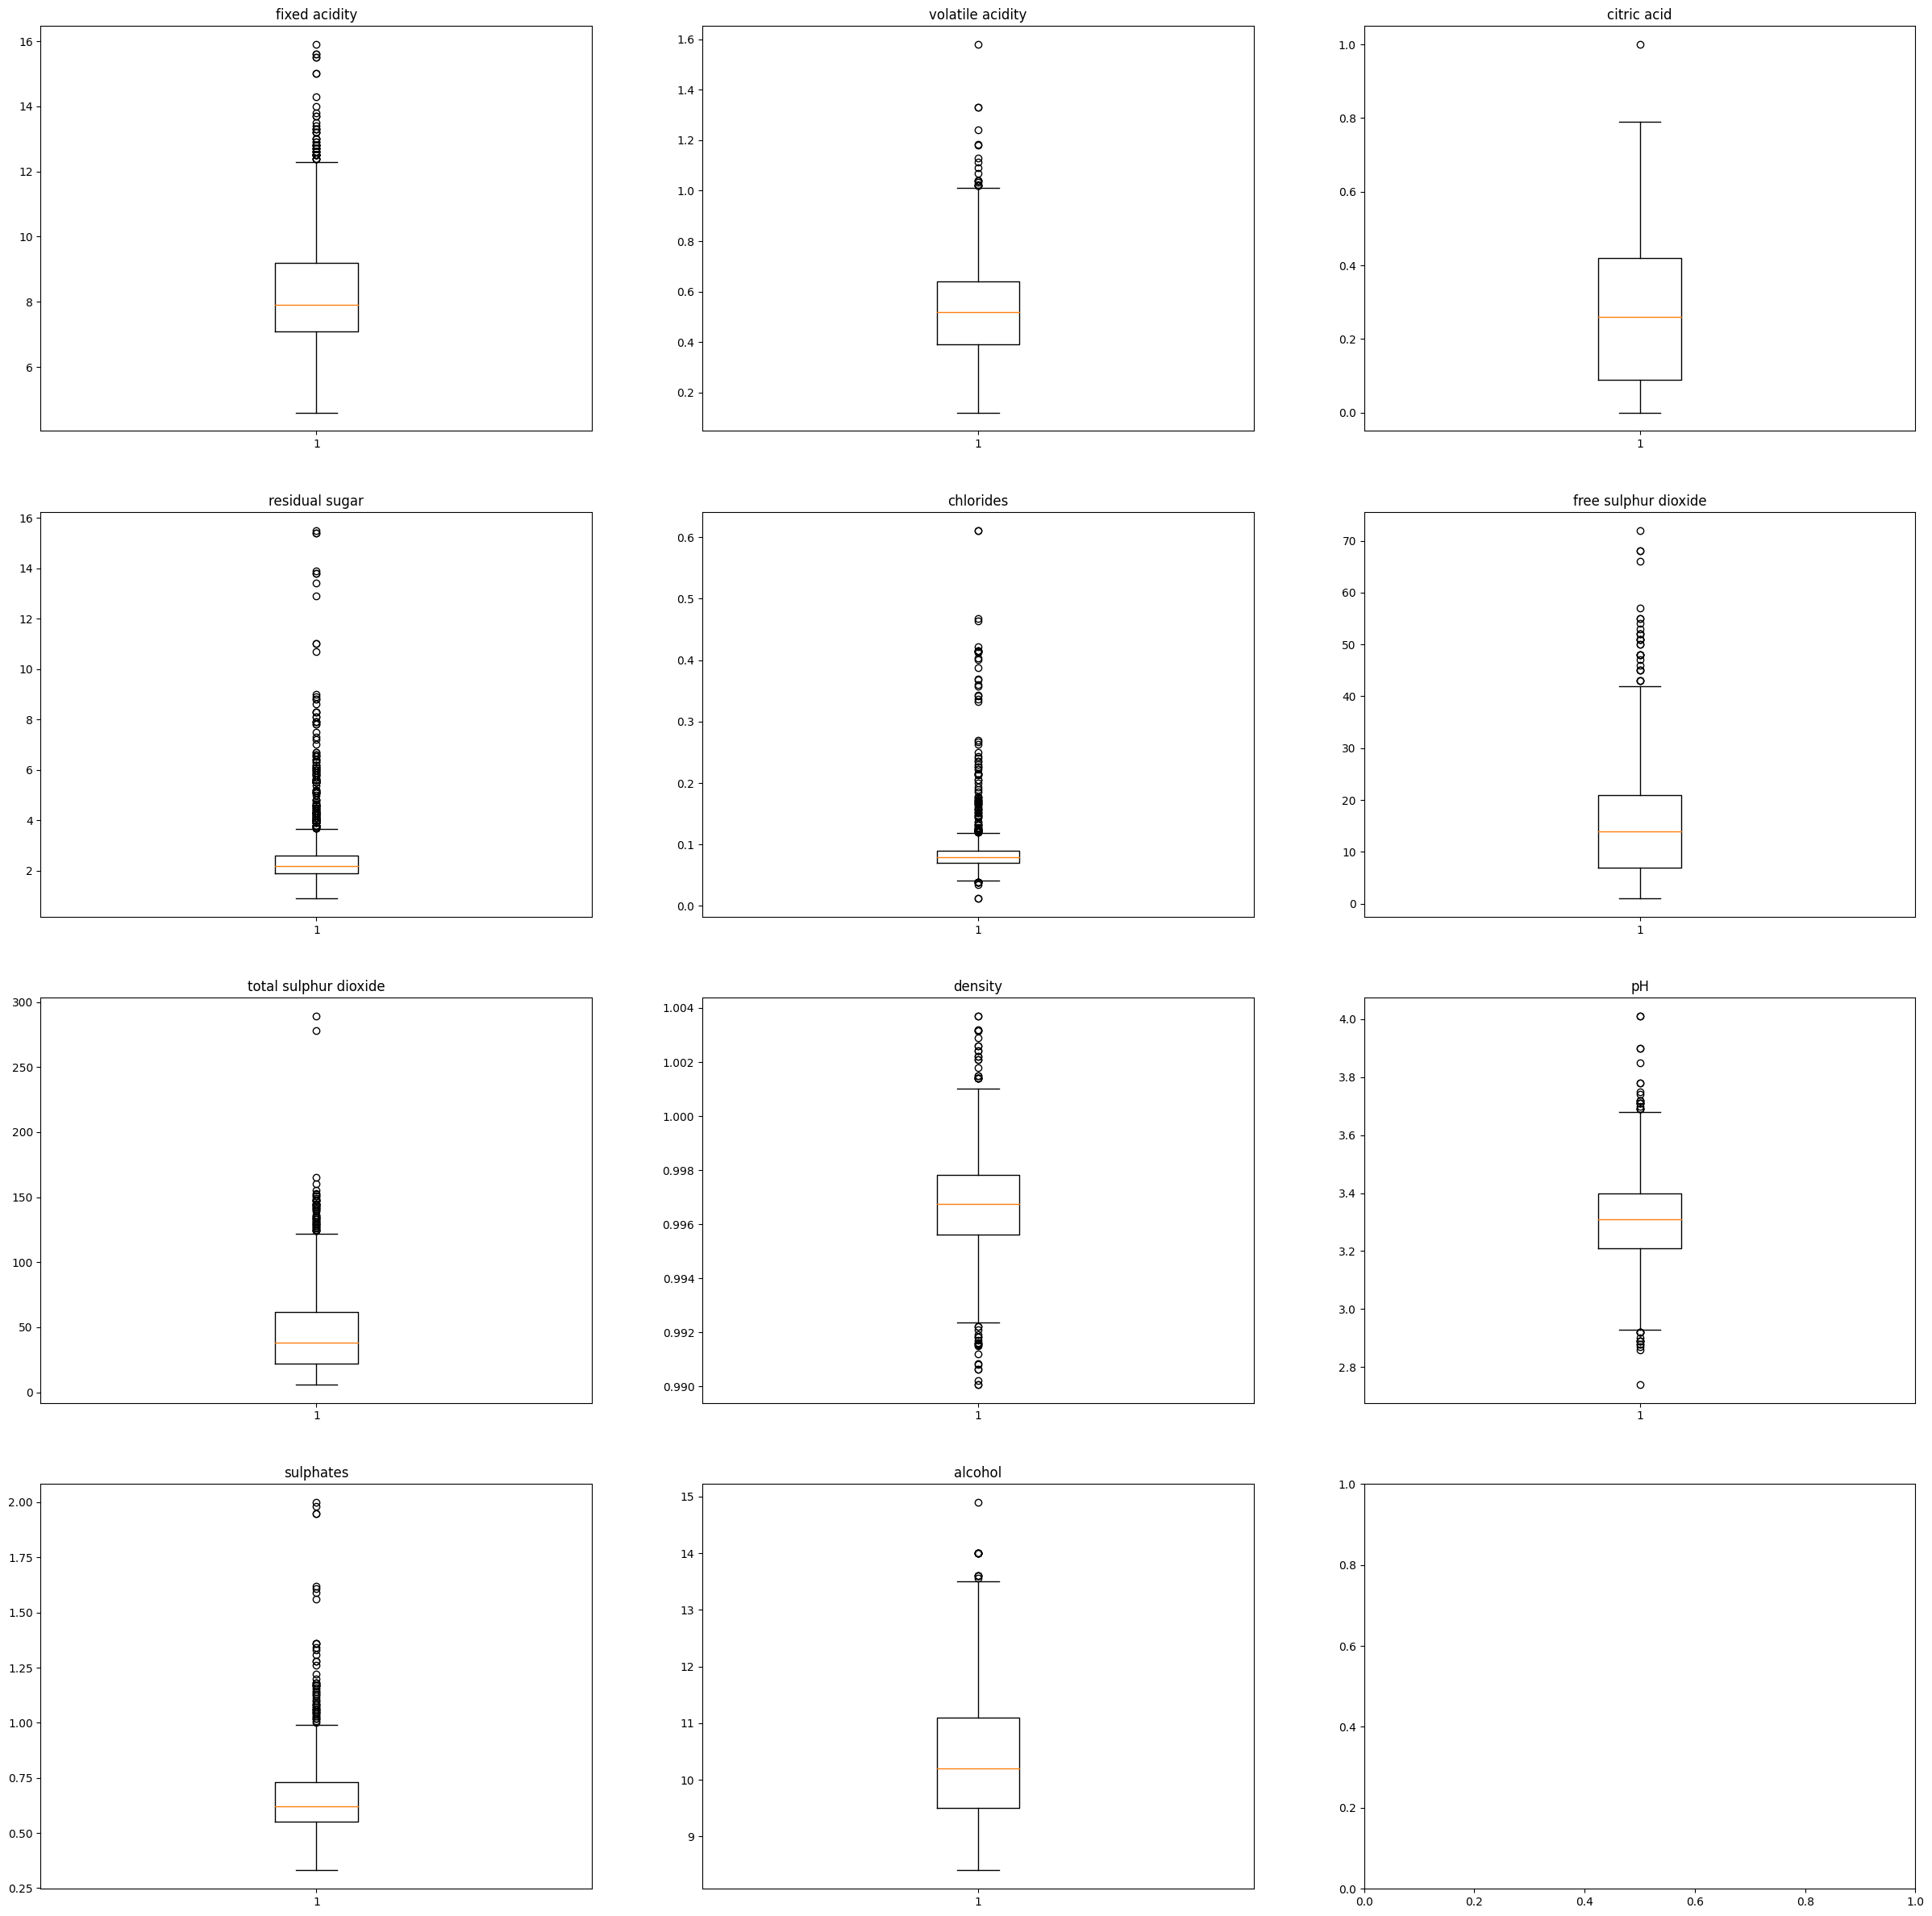

In [24]:
#creating boxplot to identify oultliers
fig,ax=plt.subplots(4,3,figsize=(30,30))
ax[0,0].boxplot(df["fixed acidity"])
ax[0,0].set_title("fixed acidity")
ax[0,1].boxplot(df["volatile acidity"])
ax[0,1].set_title("volatile acidity")
ax[0,2].boxplot(df["citric acid"])
ax[0,2].set_title("citric acid")
ax[1,0].boxplot(df["residual sugar"])
ax[1,0].set_title("residual sugar")
ax[1,1].boxplot(df["chlorides"])
ax[1,1].set_title("chlorides")
ax[1,2].boxplot(df["free sulfur dioxide"])
ax[1,2].set_title("free sulphur dioxide")
ax[2,0].boxplot(df["total sulfur dioxide"])
ax[2,0].set_title("total sulphur dioxide")
ax[2,1].boxplot(df["density"])
ax[2,1].set_title("density")
ax[2,2].boxplot(df["pH"])
ax[2,2].set_title("pH")
ax[3,0].boxplot(df["sulphates"])
ax[3,0].set_title("sulphates")
ax[3,1].boxplot(df["alcohol"])
ax[3,1].set_title("alcohol")

Q5. Perform a train-test split, dividing the data into training, validation, and test datasets.


In [25]:
X,Y=df.iloc[:,:11],df.iloc[:,11:]


In [26]:
# creatint train_test_split
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.33, random_state=42)

Q6. Scale the dataset using an appropriate scaling technique.


In [27]:
#Scaling data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train=pd.DataFrame(scaler.fit_transform(X_train),columns=X_train.columns)
X_test=scaler.fit_transform(X_test)

In [28]:
X_train

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,2.400695,-1.031037,1.127426,0.037723,-0.184551,1.078264,0.674266,1.422247,-1.260963,0.527261,-0.014319
1,-0.939671,1.229204,-1.325022,-0.104411,-0.205698,0.105783,-0.447656,-0.694295,1.526228,-0.282257,2.243632
2,-0.998274,0.551132,-1.376115,1.245861,0.111497,3.412217,0.932005,-0.650879,-0.742416,-1.207421,-0.861050
3,1.580254,-1.313567,1.587260,-0.317611,-0.713209,-0.866697,-0.841845,0.662462,-0.029413,1.278957,0.079763
4,0.056578,1.200951,-0.814096,-0.459745,0.048058,0.008535,0.492333,-0.151592,-0.807234,0.932021,-0.766969
...,...,...,...,...,...,...,...,...,...,...,...
1066,0.466799,0.381614,-1.376115,-0.459745,-0.628624,-1.061193,-1.114746,0.499652,-0.872053,-0.166612,-0.014319
1067,-0.060627,0.579385,-0.865188,-0.317611,-0.311429,0.883768,0.401366,-0.216716,-0.159050,0.527261,0.456088
1068,-0.646657,0.494626,-1.069559,0.108790,-0.226844,-0.088713,1.159422,0.369403,1.266955,-0.687016,-0.861050
1069,-0.236436,-1.878628,0.412128,-0.601879,-0.713209,-0.866697,-0.963134,-1.193582,0.035405,0.816375,1.396901


In [29]:
Y_train

,quality
548,1
355,1
1296,0
209,1
140,0
...,...
1130,1
1294,1
860,0
1459,1


Q7. Design and implement at least two hidden layers and an output layer for the binary categorical
variables.


In [30]:
#creating a ANN Layers
Layers=[tf.keras.layers.Flatten(input_shape=(11,),name="Inputlayer"),
        tf.keras.layers.Dense(8,activation="relu",name="HiddenLayer1"),
        tf.keras.layers.Dense(4,activation="relu",name="HiddenLayer2"),
        tf.keras.layers.Dense(1,activation="sigmoid",name="OutputLayer")]


Q8. Create a Sequential model in Keras and add the previously designed layers to it.


In [31]:
# creating model for above layers
model_wine=tf.keras.Sequential(Layers)

Q9. Print the summary of the model architecture.


In [32]:
# Checking Summary
model_wine.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Inputlayer (Flatten)        (None, 11)                0         
                                                                 
 HiddenLayer1 (Dense)        (None, 8)                 96        
                                                                 
 HiddenLayer2 (Dense)        (None, 4)                 36        
                                                                 
 OutputLayer (Dense)         (None, 1)                 5         
                                                                 
Total params: 137 (548.00 Byte)
Trainable params: 137 (548.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Q10. Set the loss function(‘binary_crossentropy’), optimizer, and include the accuracy metric in the model.


In [33]:
# Defining Parameters for model
LOSS_FUNCTION = "binary_crossentropy"
OPTIMIZER = "adam"
METRICS = ["accuracy"]



Q11. Compile the model with the specified loss function, optimizer, and metrics.


In [34]:
# Compiling model
model_wine.compile(loss=LOSS_FUNCTION,optimizer=OPTIMIZER,metrics=METRICS)

Q12. Fit the model to the training data using appropriate batch size and number of epochs.


In [35]:
# Training the model
history=model_wine.fit(X_train, Y_train, epochs = 10,
           batch_size = 1)

Epoch 1/10
1071/1071 [==============================] - 7s 3ms/step - loss: 0.6148 - accuracy: 0.6639
Epoch 2/10
1071/1071 [==============================] - 3s 3ms/step - loss: 0.5464 - accuracy: 0.7264
Epoch 3/10
1071/1071 [==============================] - 3s 3ms/step - loss: 0.5258 - accuracy: 0.7376
Epoch 4/10
1071/1071 [==============================] - 5s 4ms/step - loss: 0.5135 - accuracy: 0.7572
Epoch 5/10
1071/1071 [==============================] - 5s 4ms/step - loss: 0.5059 - accuracy: 0.7479
Epoch 6/10
1071/1071 [==============================] - 3s 3ms/step - loss: 0.4990 - accuracy: 0.7591
Epoch 7/10
1071/1071 [==============================] - 3s 3ms/step - loss: 0.4949 - accuracy: 0.7572
Epoch 8/10
1071/1071 [==============================] - 4s 4ms/step - loss: 0.4897 - accuracy: 0.7563
Epoch 9/10
1071/1071 [==============================] - 4s 4ms/step - loss: 0.4879 - accuracy: 0.7703
Epoch 10/10
1071/1071 [==============================] - 3s 3ms/step - loss: 0.487

Q13. Obtain the model's parameters (weights and biases).


In [36]:
# Getting weights of Hidden Layer1
model_wine.layers[1].get_weights()

[array([[-0.00321036, -0.4230613 ,  0.42370278, -0.23259206, -0.06667622,
         -0.16193183,  0.23819889, -0.39871883],
        [-0.49265262,  0.24000998,  0.16214311, -0.16781478,  0.12610571,
          0.23582736, -0.22722569,  0.02071792],
        [-0.28180113,  0.11473899,  0.103845  ,  0.28589094,  0.37542948,
          0.05877098, -0.4905056 , -0.12665905],
        [ 0.16246322, -0.09846647,  0.6671296 , -0.16820502,  0.1618589 ,
          0.06274435,  0.13626899, -0.0761954 ],
        [-0.15434326,  0.35766762, -0.2872256 , -0.47955874, -0.14915852,
          0.23906332,  0.39003283, -0.22309704],
        [ 0.29014805,  0.14870487, -0.28766134,  0.20434268, -0.28122962,
         -0.06436452,  0.0103586 ,  0.15142027],
        [-0.59865844,  0.41114795,  0.37437347,  0.17492363, -0.83850676,
         -0.6717237 , -0.23222153,  0.9094827 ],
        [-0.4618593 ,  0.16005532, -0.76785535, -0.29162407, -0.21058373,
          0.47036538,  0.37521556,  0.16174453],
        [-0.4260

In [37]:
# Getting weights and bais of HiddenLayer2
model_wine.layers[2].get_weights()

[array([[ 0.39605355,  0.5932331 ,  0.35925207, -0.13970907],
        [ 0.57247084,  0.32274324, -0.25344768,  0.5093526 ],
        [-0.42994028, -0.3231289 , -0.5836592 , -0.5759965 ],
        [-0.69535905,  0.58847815,  0.17334591,  0.14691637],
        [-0.56697977,  0.51399946,  0.29666778,  0.687463  ],
        [-0.06928343, -0.4011829 , -0.6459173 ,  1.1322119 ],
        [-0.67511237, -0.0496062 ,  0.4303934 , -0.15053463],
        [ 0.73814833, -0.59954935,  0.06198595,  0.55649954]],
       dtype=float32),
 array([-0.00431338,  0.14918806,  0.38799208,  0.12732068], dtype=float32)]

Q14. Store the model's training history as a Pandas DataFrame.

In [38]:
# Pandas Dataframe
data_wine=pd.DataFrame(history.history)

In [39]:
#showing dataframe
data_wine

,loss,accuracy
0,0.614805,0.663866
1,0.546373,0.726424
2,0.525839,0.737628
3,0.513520,0.757236
4,0.505862,0.747899
5,0.499011,0.759104
6,0.494894,0.757236
7,0.489664,0.756303
8,0.487937,0.770308
9,0.487034,0.773109


Q15. Plot the training history (e.g., accuracy and loss) using suitable visualization techniques.


Text(0.5, 0, 'Number of Epoches')

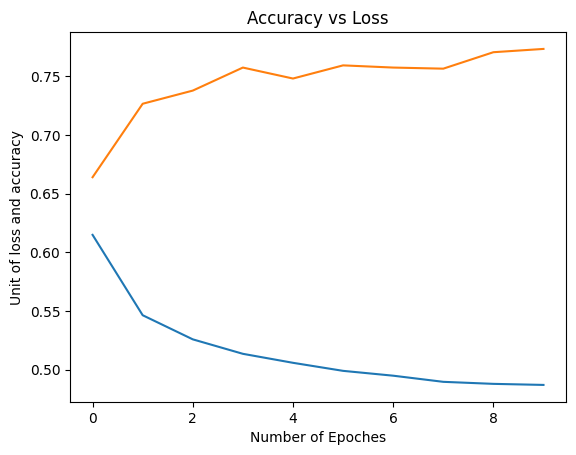

In [40]:
#plotting of data
plt.plot(data_wine)
plt.title("Accuracy vs Loss")
plt.ylabel("Unit of loss and accuracy")
plt.xlabel("Number of Epoches")


Orange line shows Accuracy and Blue line shows loss

Q16. Evaluate the model's performance using the test dataset and report relevant metrics.

In [53]:
# Predicting the Value
y_pred = model_wine.predict(X_test)
Y_pred=y_pred[:].astype(int)

17/17 [==============================] - 0s 3ms/step


In [54]:
Y_test.head()

,quality
803,1
124,0
350,1
682,0
1326,1


In [55]:
# confusion metrix
from sklearn.metrics import confusion_matrix
confusion_matrix(Y_test,Y_pred)

array([[238,   0],
       [290,   0]])